In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# Step 1: Load the Dataset

In [3]:
# Load the data
df = pd.read_csv("data.csv")  # Make sure data.csv is in the same folder
df.shape


(1460, 81)

In [4]:
# Show first 5 rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2: Understand and Clean the Data


In [7]:
# Count of missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
# Drop columns with more than 30% missing data
threshold = len(df) * 0.3
df = df.dropna(thresh=threshold, axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [11]:
# Fill numeric missing values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Step 3: Encode Categorical Variables


In [12]:
# Use Label Encoding for simplicity
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


# Step 4: Exploratory Data Analysis (EDA)


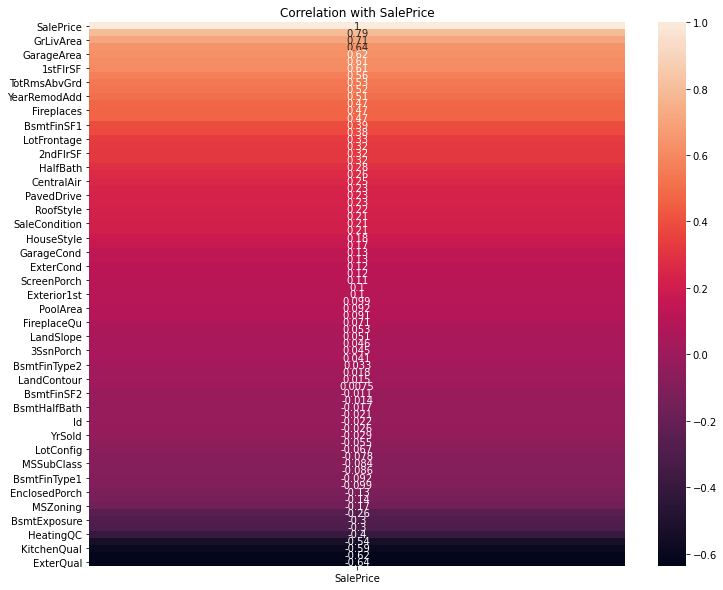

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title("Correlation with SalePrice")
plt.show()


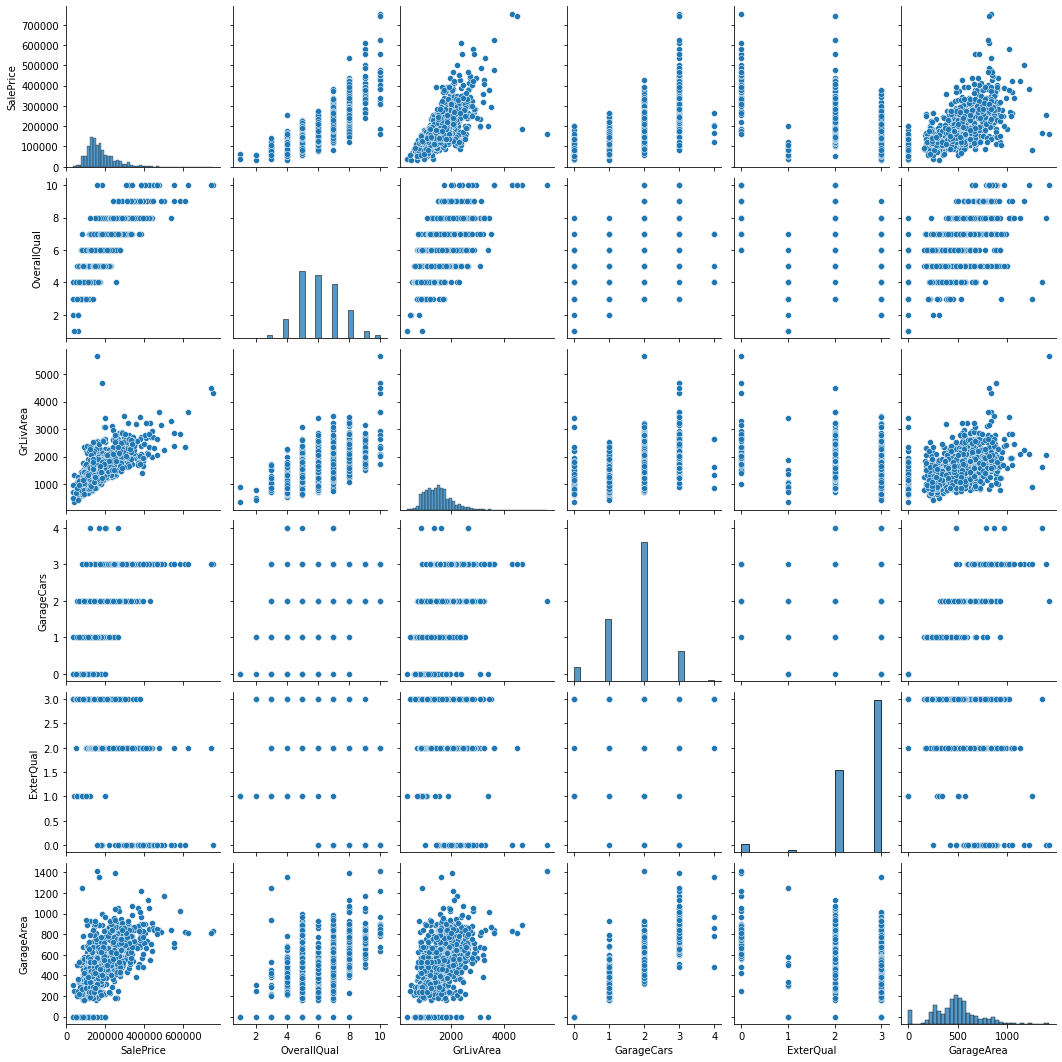

In [14]:
# Top 5 numerical features
top_corr = df.corr()['SalePrice'].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr])
plt.show()


# Step 5: Model Preparation


In [15]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Train Multiple Models


In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.2f}")


Linear Regression - RMSE: 34236.06, R2: 0.85
Random Forest - RMSE: 28667.44, R2: 0.89
Gradient Boosting - RMSE: 29127.08, R2: 0.89


# Step 7: Feature Importance (For Tree Models)

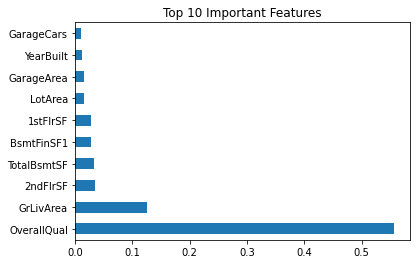

In [17]:
feat_imp = pd.Series(models['Random Forest'].feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


# Step 8: Buyer Recommendations

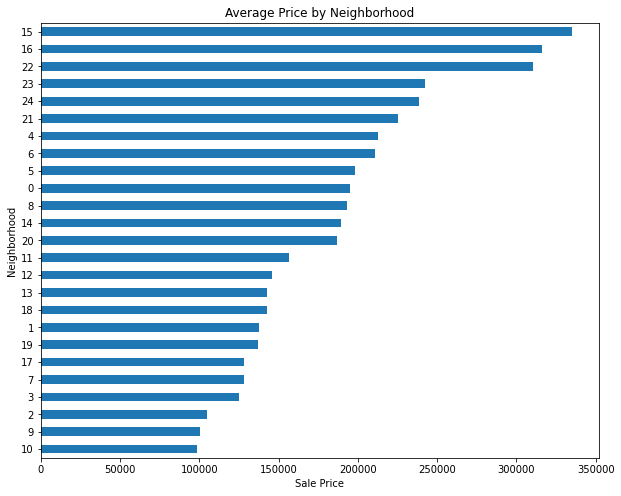

In [18]:
# Reverse encoded values for readability if you saved mappings earlier
# df['Neighborhood'] = le.inverse_transform(df['Neighborhood'])

# Show avg price by neighborhood
neigh_avg = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
neigh_avg.plot(kind='barh', figsize=(10, 8))
plt.title("Average Price by Neighborhood")
plt.xlabel("Sale Price")
plt.ylabel("Neighborhood")
plt.show()


# Step 9: Report on Challenges


### Challenges Faced
1. **Missing Data**: Many columns had missing values, especially in basement and garage features. These were filled using median (for numerical) and mode (for categorical).
2. **High Cardinality**: Categorical features had many unique values, which were handled using Label Encoding.
3. **Feature Correlation**: Some variables were highly correlated; this helped select the most impactful ones for modeling.
4. **Model Tuning**: Default hyperparameters worked decently, but further tuning can improve performance.


# 1. Split Your Data for Testing

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Choose Regression Metrics

Commonly used metrics:
Metric	Description
R² Score	Proportion of variance in SalePrice explained by features (closer to 1 is better).

RMSE	Root Mean Squared Error – lower is better. Penalizes large errors.

MAE	Mean Absolute Error – average of absolute errors, less sensitive to outliers.



# 3. Test the Model

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have a trained model:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 29295.45
MAE: 17708.71
R² Score: 0.89


4. Interpret the Results

R² Score close to 1 → Your model explains most of the variance.

Low RMSE/MAE → Predictions are close to actual prices.

Compare RMSE to the average house price to get a sense of error scale.



# 5. Visualize Predicted vs Actual


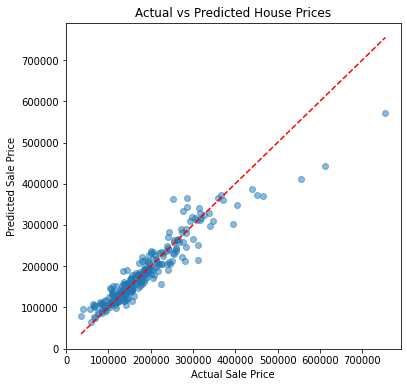

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
